In [29]:
# importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import missingno as msno

In [55]:
from google.colab import files
uploaded = files.upload()

for filename in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=filename, length=len(uploaded[filename])))

Saving dataset-2.csv to dataset-2 (1).csv
User uploaded file "dataset-2 (1).csv" with length 30752741 bytes


In [32]:
# loading the dataset
df = pd.read_csv('/content/dataset-2.csv')

In [33]:
# creating new features
df['Credit_History_Months'] = df['Credit_History_Age'].astype(int)
df['Monthly_Balance_Per_Income'] = df['Monthly_Balance'] / df['Monthly_Inhand_Salary']

In [34]:
# Dataset Overview
print("🔹 Dataset Shape:", df.shape)
print("🔹 Columns:", df.columns.tolist())
print("\n🔹 Info:")
print(df.info())
print("\n🔹 Missing Values:\n", df.isnull().sum())

🔹 Dataset Shape: (100000, 30)
🔹 Columns: ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score', 'Credit_History_Months', 'Monthly_Balance_Per_Income']

🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          100000 non-null  int64  
 1   Customer_ID                 100000 non-null  int64  
 2   Month                       100000 non-

In [35]:
# Exploration: Head, Tail, Dictionary
print("\n🔹 First 5 Rows:\n", df.head())
print("\n🔹 Last 5 Rows:\n", df.tail())

# Data Dictionary (example format – you can expand as needed)
data_dict = pd.DataFrame({
    "Column Name": df.columns,
    "Data Type": df.dtypes.values,
    "Null Values": df.isnull().sum().values
})
print("\n🔹 Data Dictionary:\n", data_dict)



🔹 First 5 Rows:
      ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0       19114.12            1824.843333                3.0  ...   
1       19114.12            1824.843333                3.0  ...   
2       19114.12            1824.843333                3.0  ...   
3       19114.12            1824.843333                3.0  ...   
4       19114.12            1824.843333                3.0  ...   

   Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
0                 26.822620               265.0 

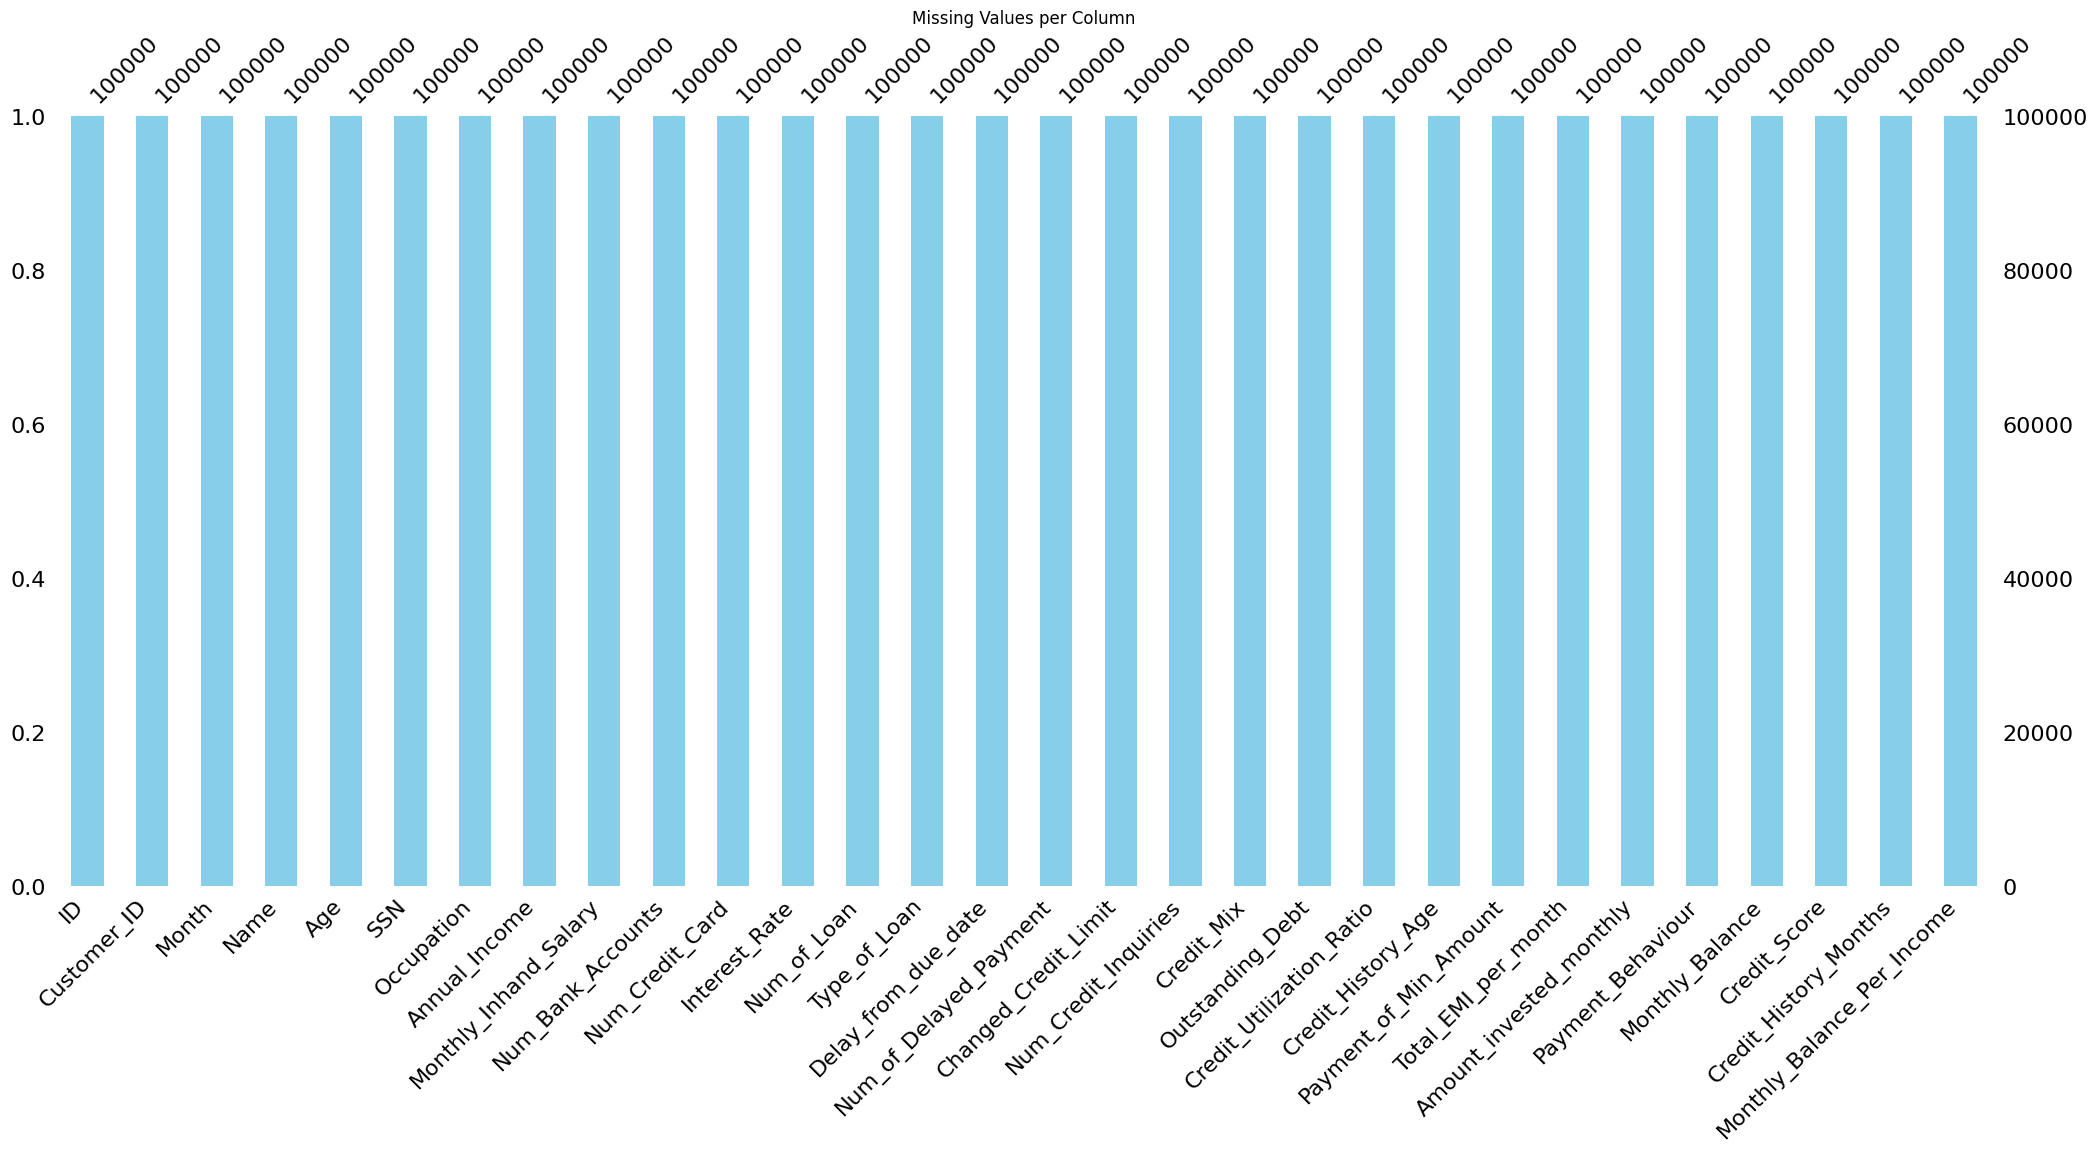

<Figure size 1200x500 with 0 Axes>

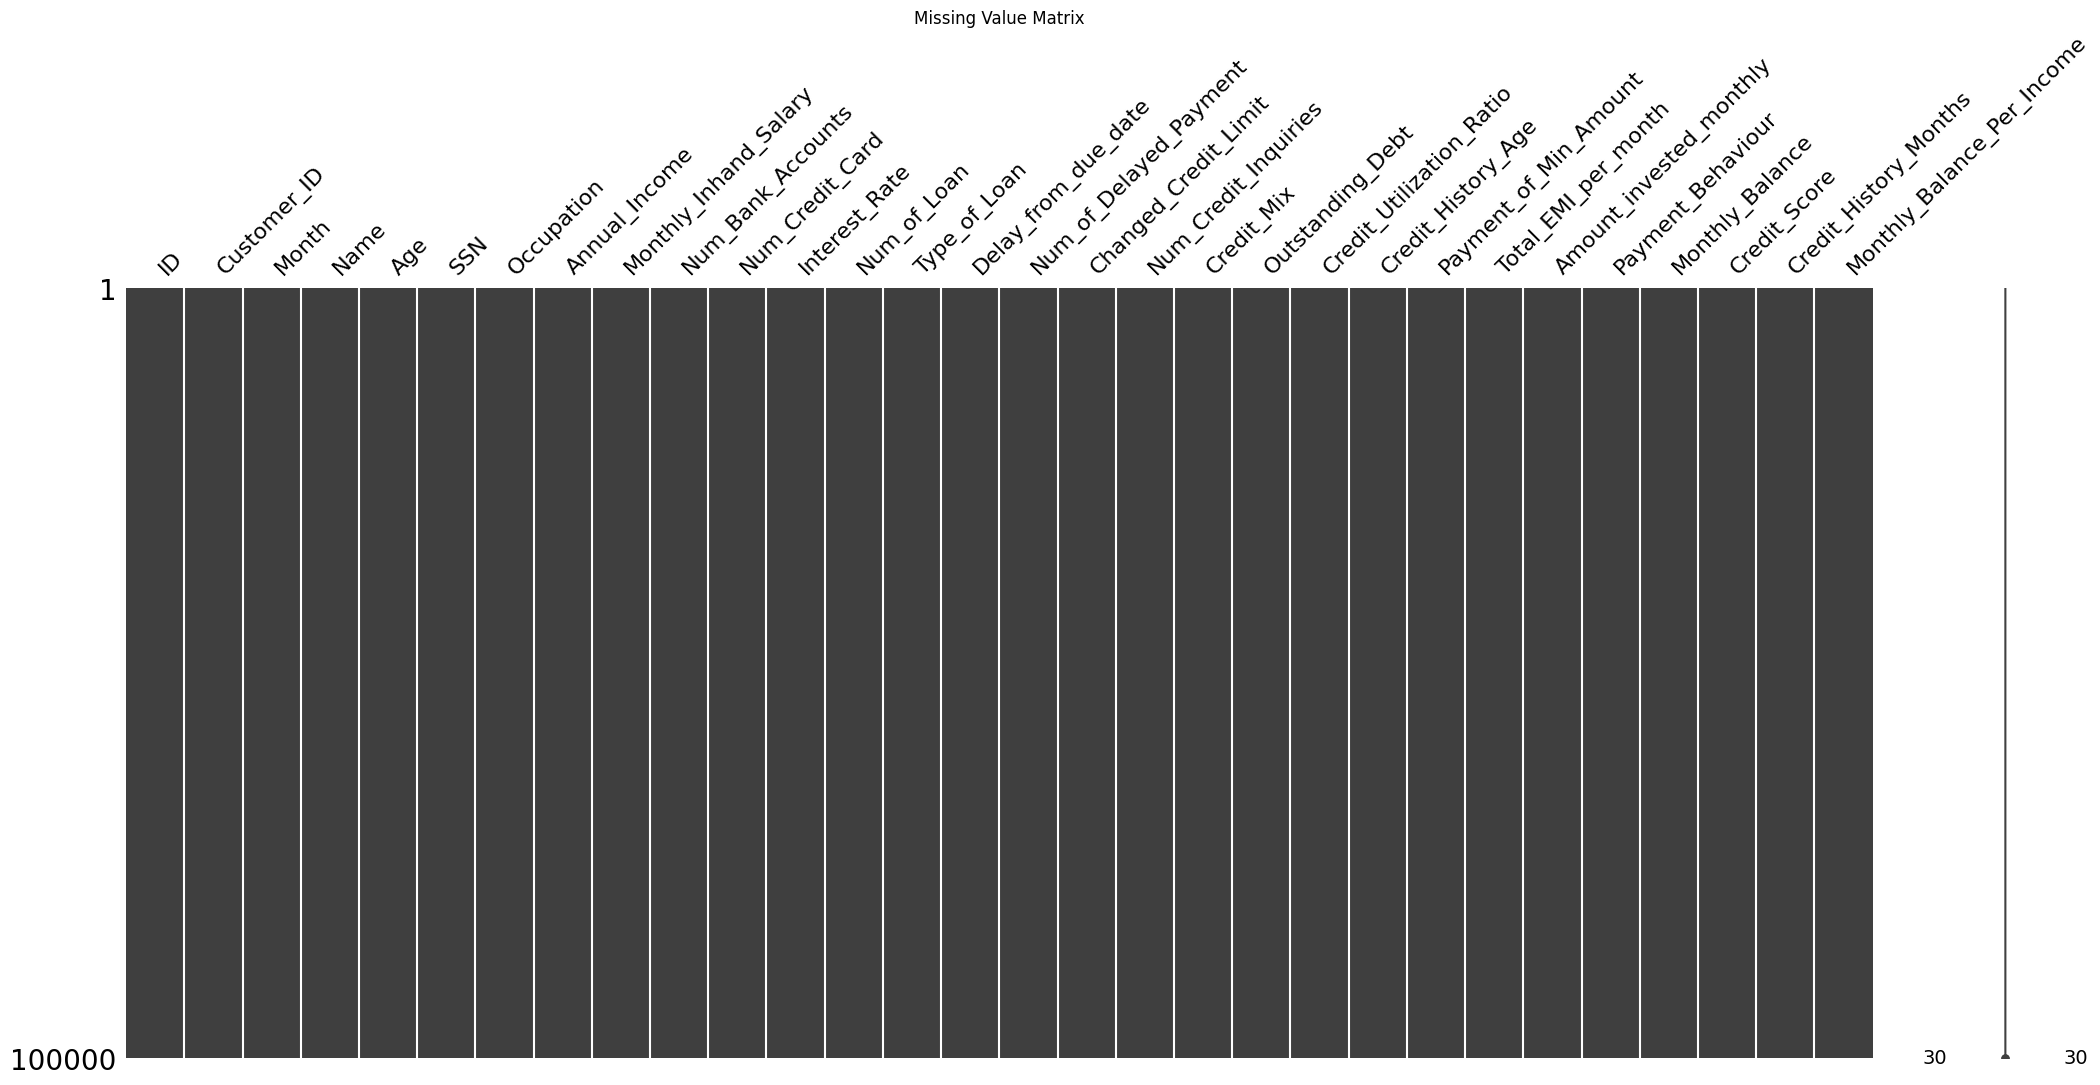

In [36]:
# Missing Value Visualization
plt.figure(figsize=(12,5))
msno.bar(df, color="skyblue")
plt.title("Missing Values per Column")
plt.show()

plt.figure(figsize=(12,5))
msno.matrix(df)
plt.title("Missing Value Matrix")
plt.show()

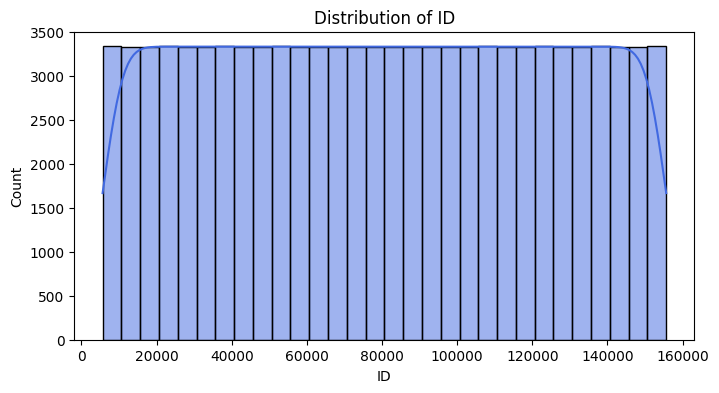

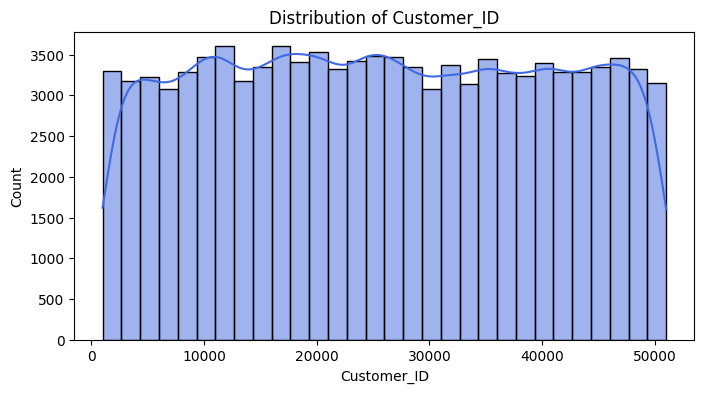

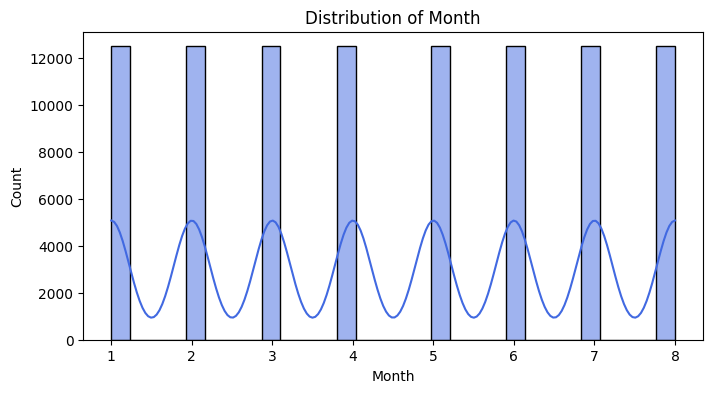

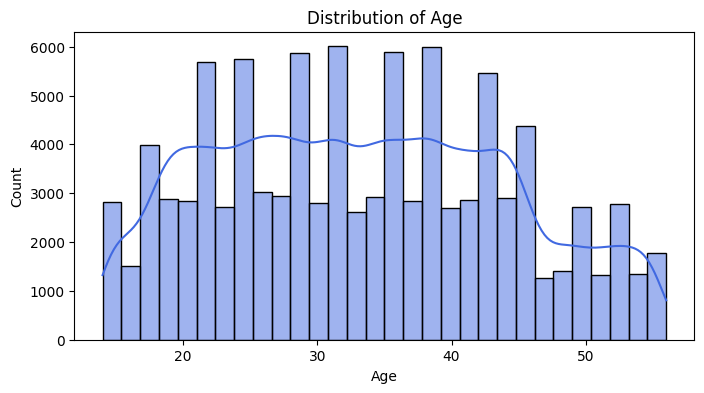

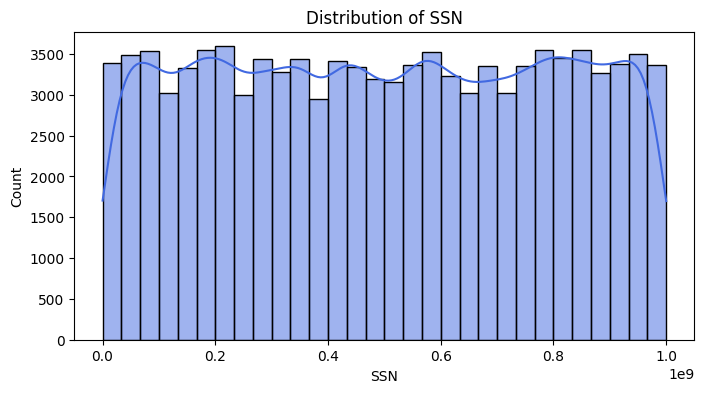

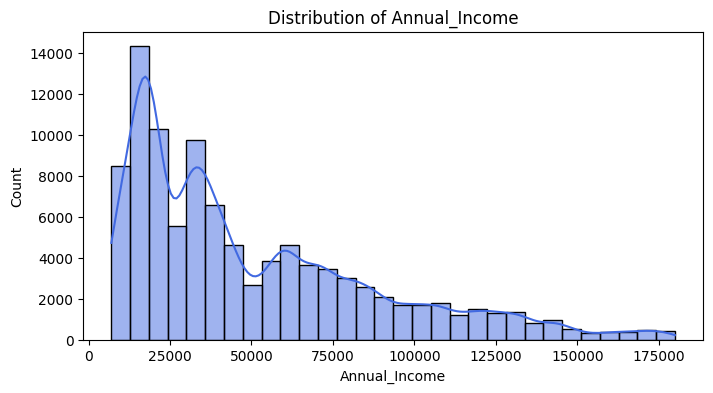

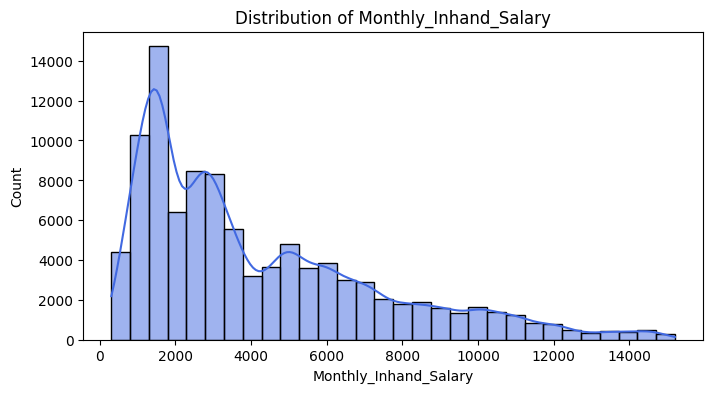

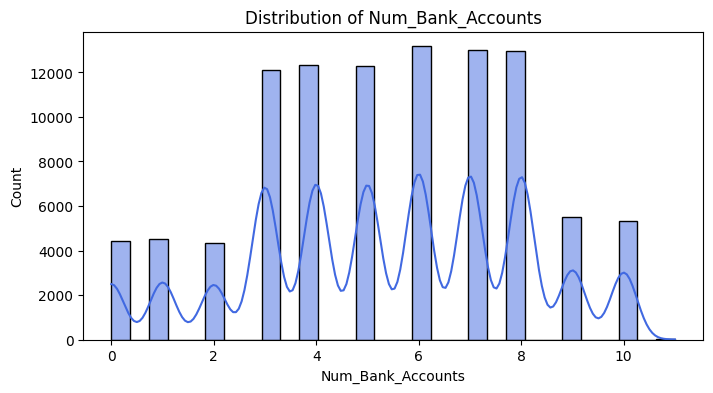

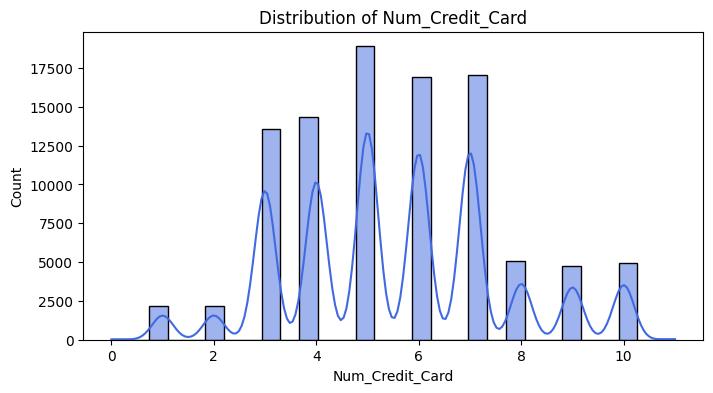

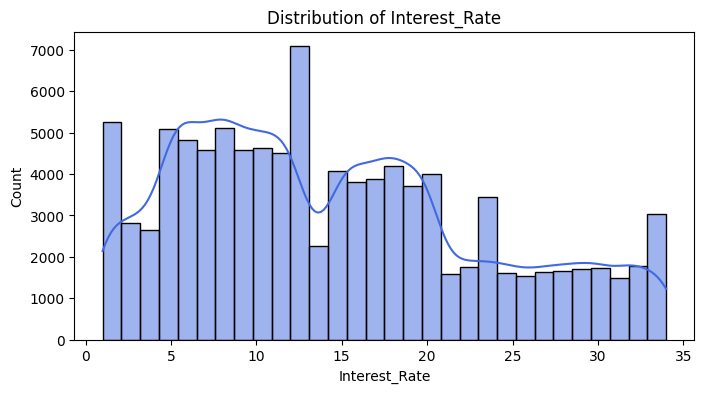

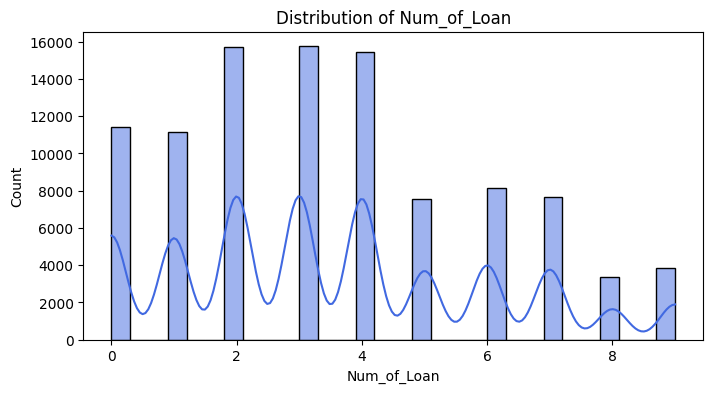

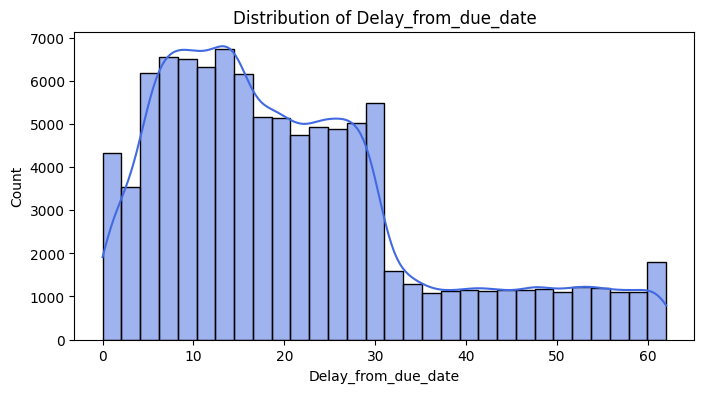

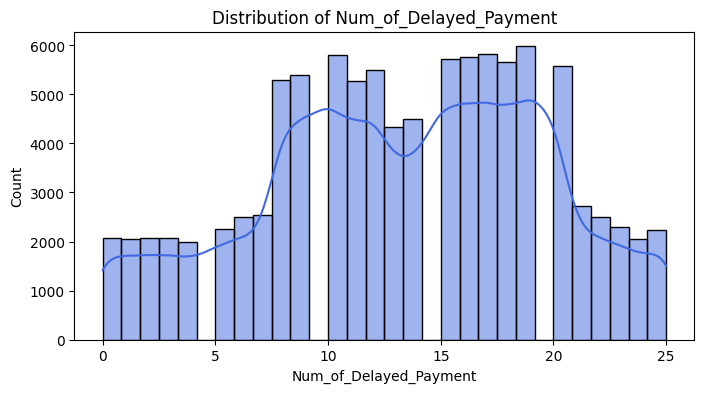

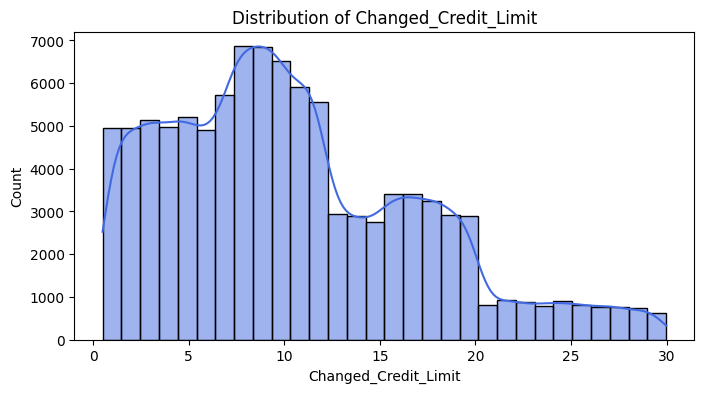

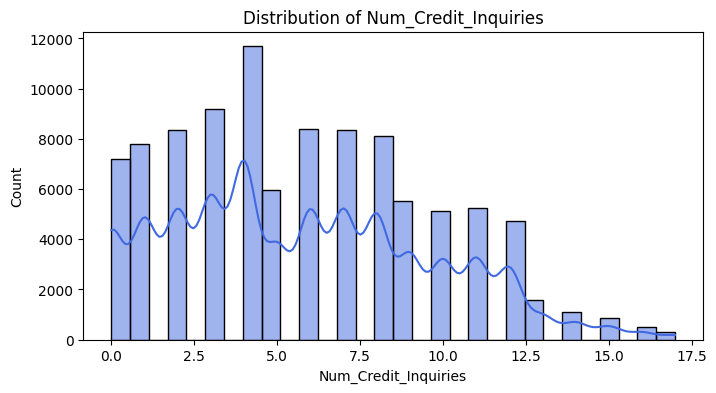

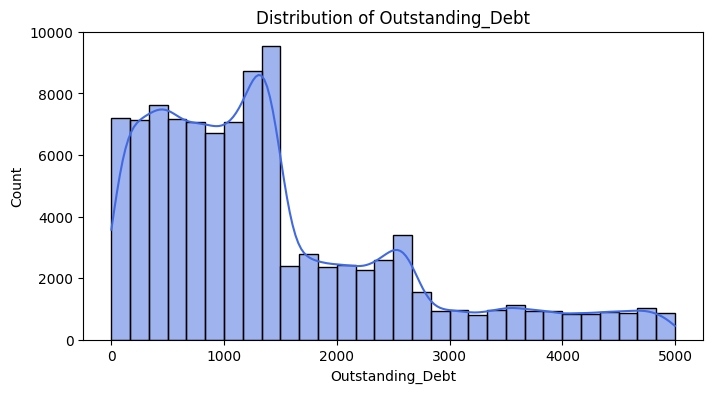

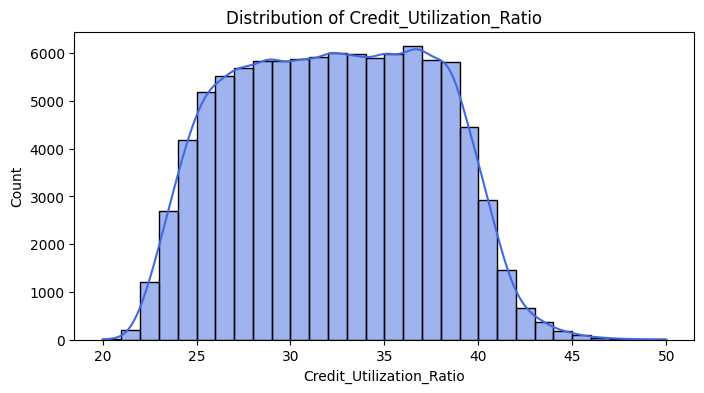

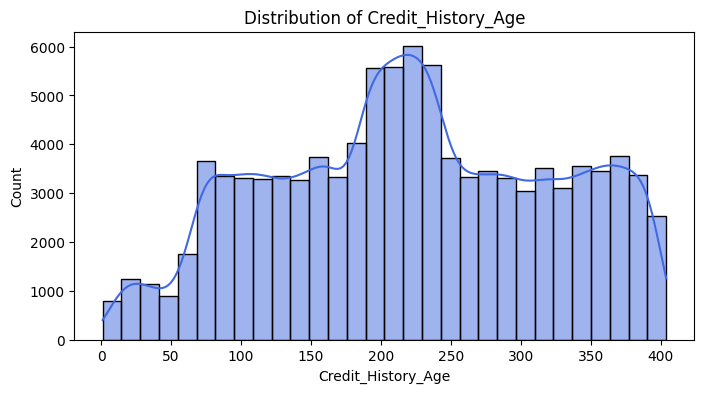

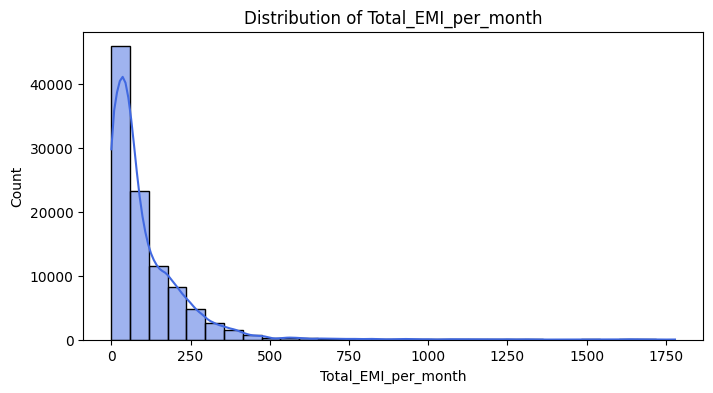

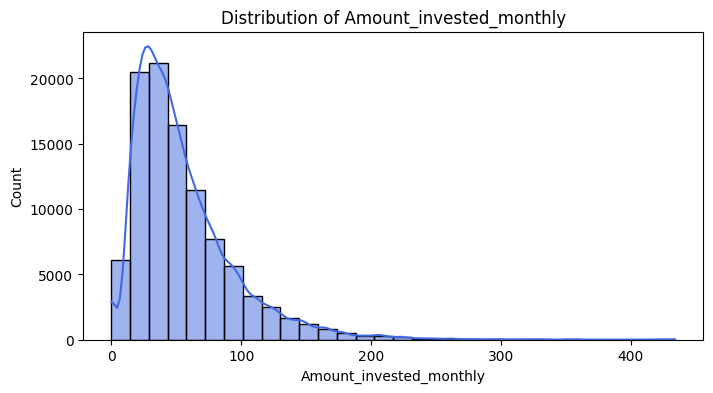

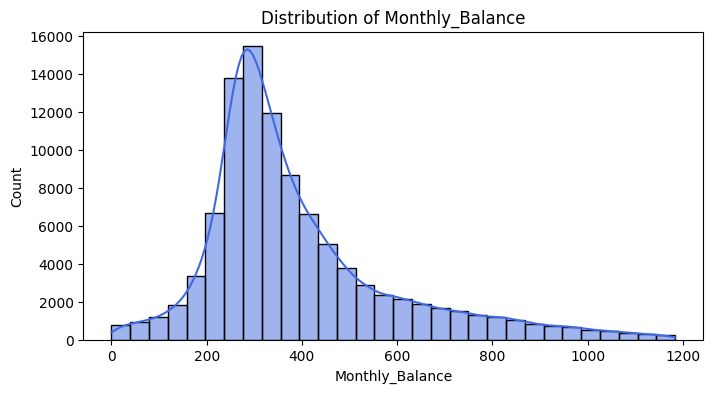

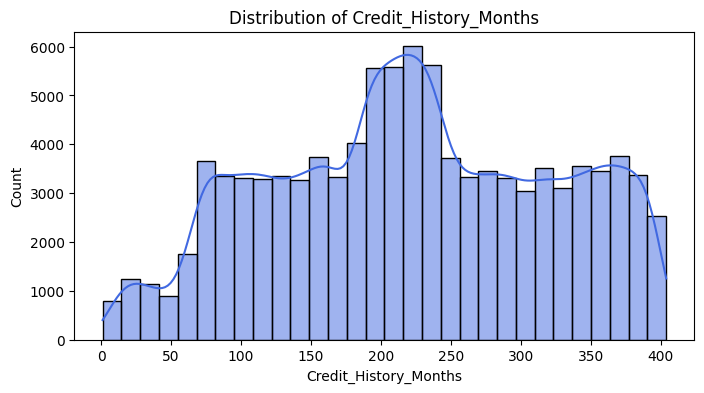

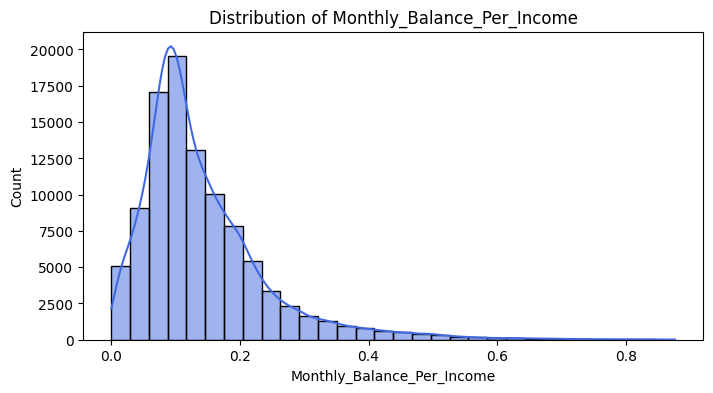

In [37]:
# Distribution of Numerical Features
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, color="royalblue", bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

/tmp/ipython-input-760378856.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="magma")


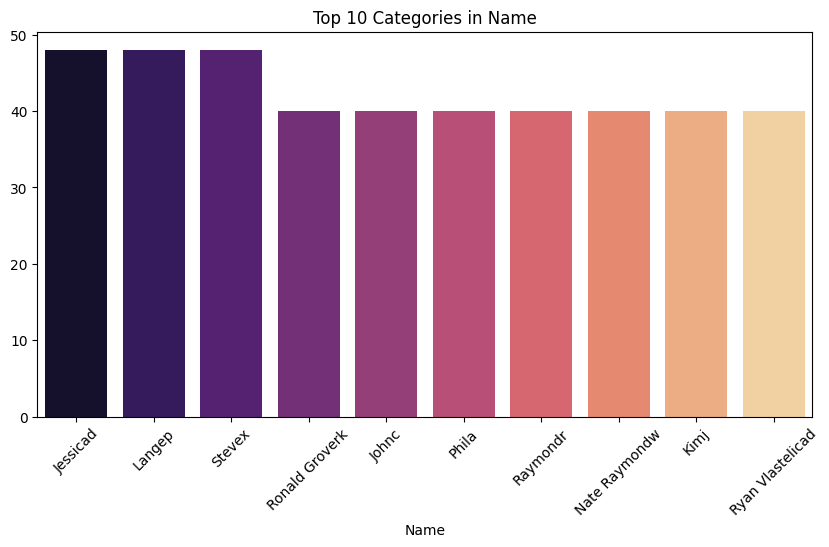

/tmp/ipython-input-760378856.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="magma")


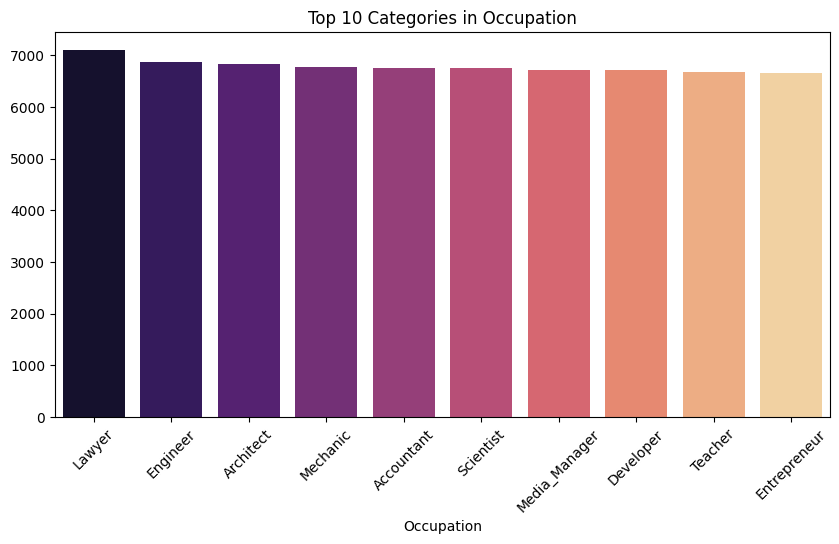

/tmp/ipython-input-760378856.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="magma")


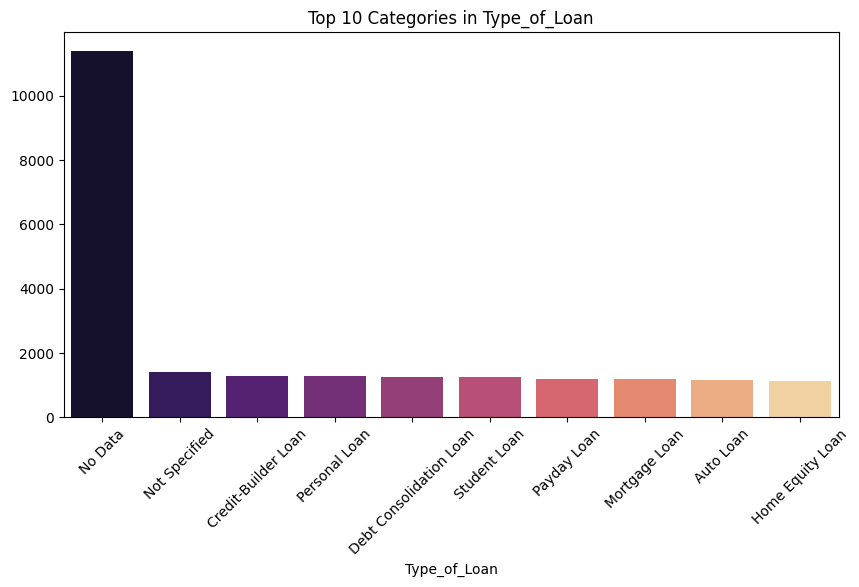

/tmp/ipython-input-760378856.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="magma")


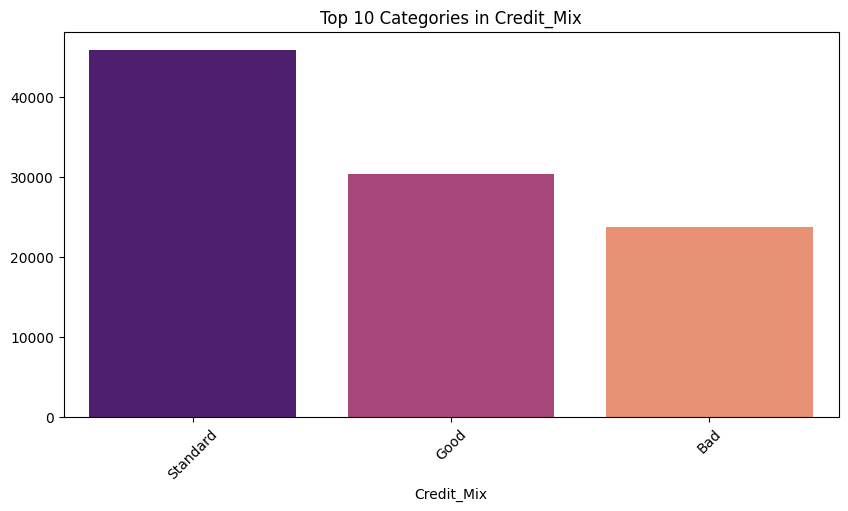

/tmp/ipython-input-760378856.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="magma")


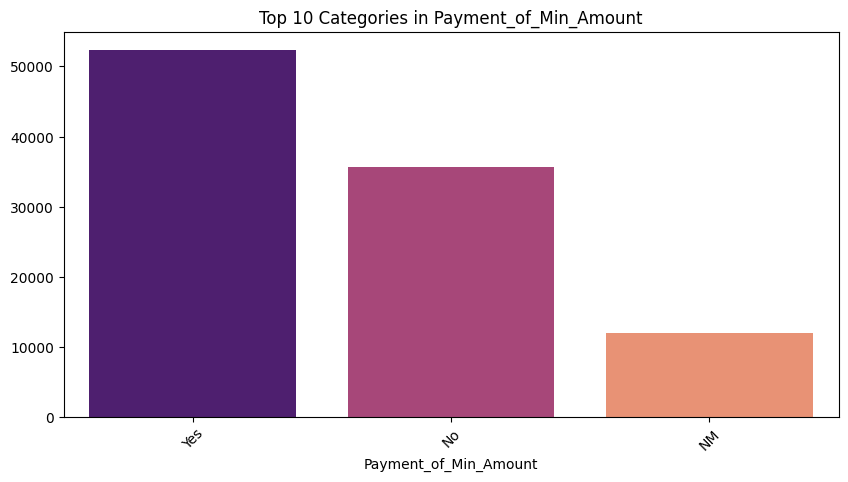

/tmp/ipython-input-760378856.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="magma")


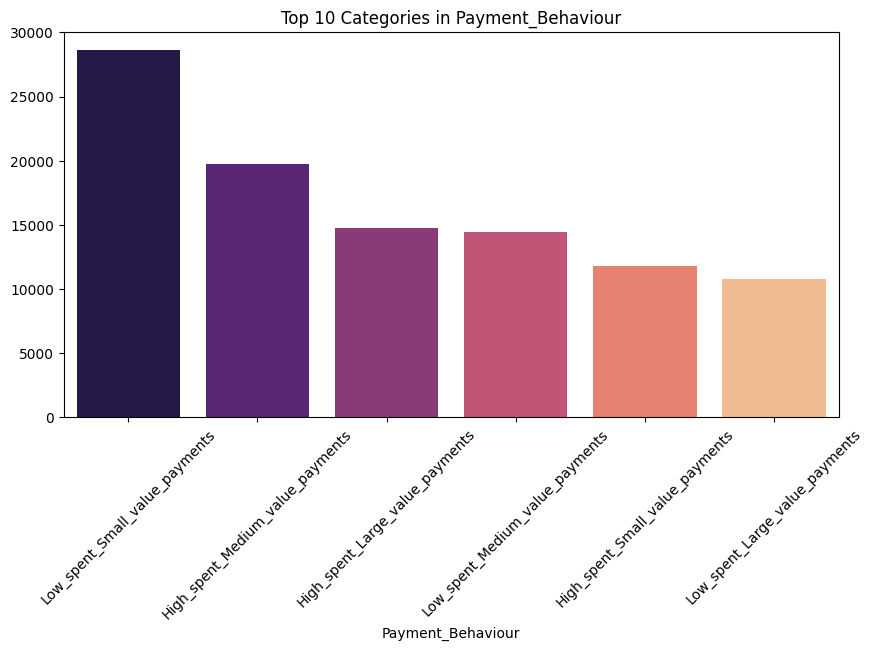

/tmp/ipython-input-760378856.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="magma")


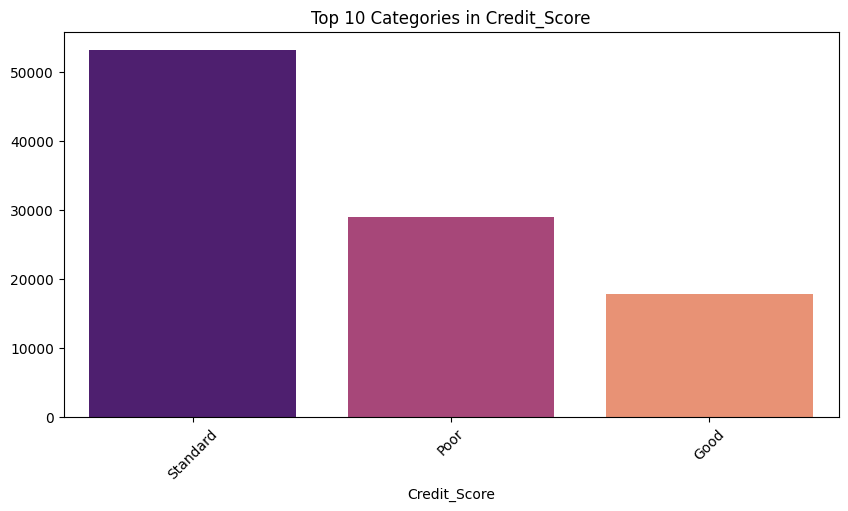

In [38]:
# Distribution of Categorical Features
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(10,5))
    top_categories = df[col].value_counts().nlargest(10)  # Top 10
    sns.barplot(x=top_categories.index, y=top_categories.values, palette="magma")
    plt.title(f"Top 10 Categories in {col}")
    plt.xticks(rotation=45)
    plt.show()


/tmp/ipython-input-4265914537.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_Score", data=df, palette="Set2")


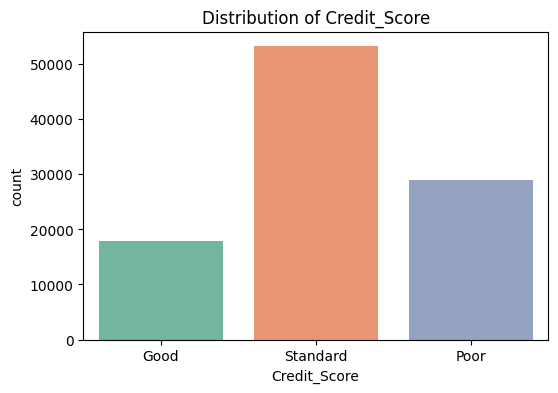


Credit Score Distribution:
 Credit_Score
Standard    53.174
Poor        28.998
Good        17.828
Name: proportion, dtype: float64


In [39]:
# Target Variable
if "Credit_Score" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="Credit_Score", data=df, palette="Set2")
    plt.title("Distribution of Credit_Score")
    plt.show()
    print("\nCredit Score Distribution:\n", df["Credit_Score"].value_counts(normalize=True)*100)

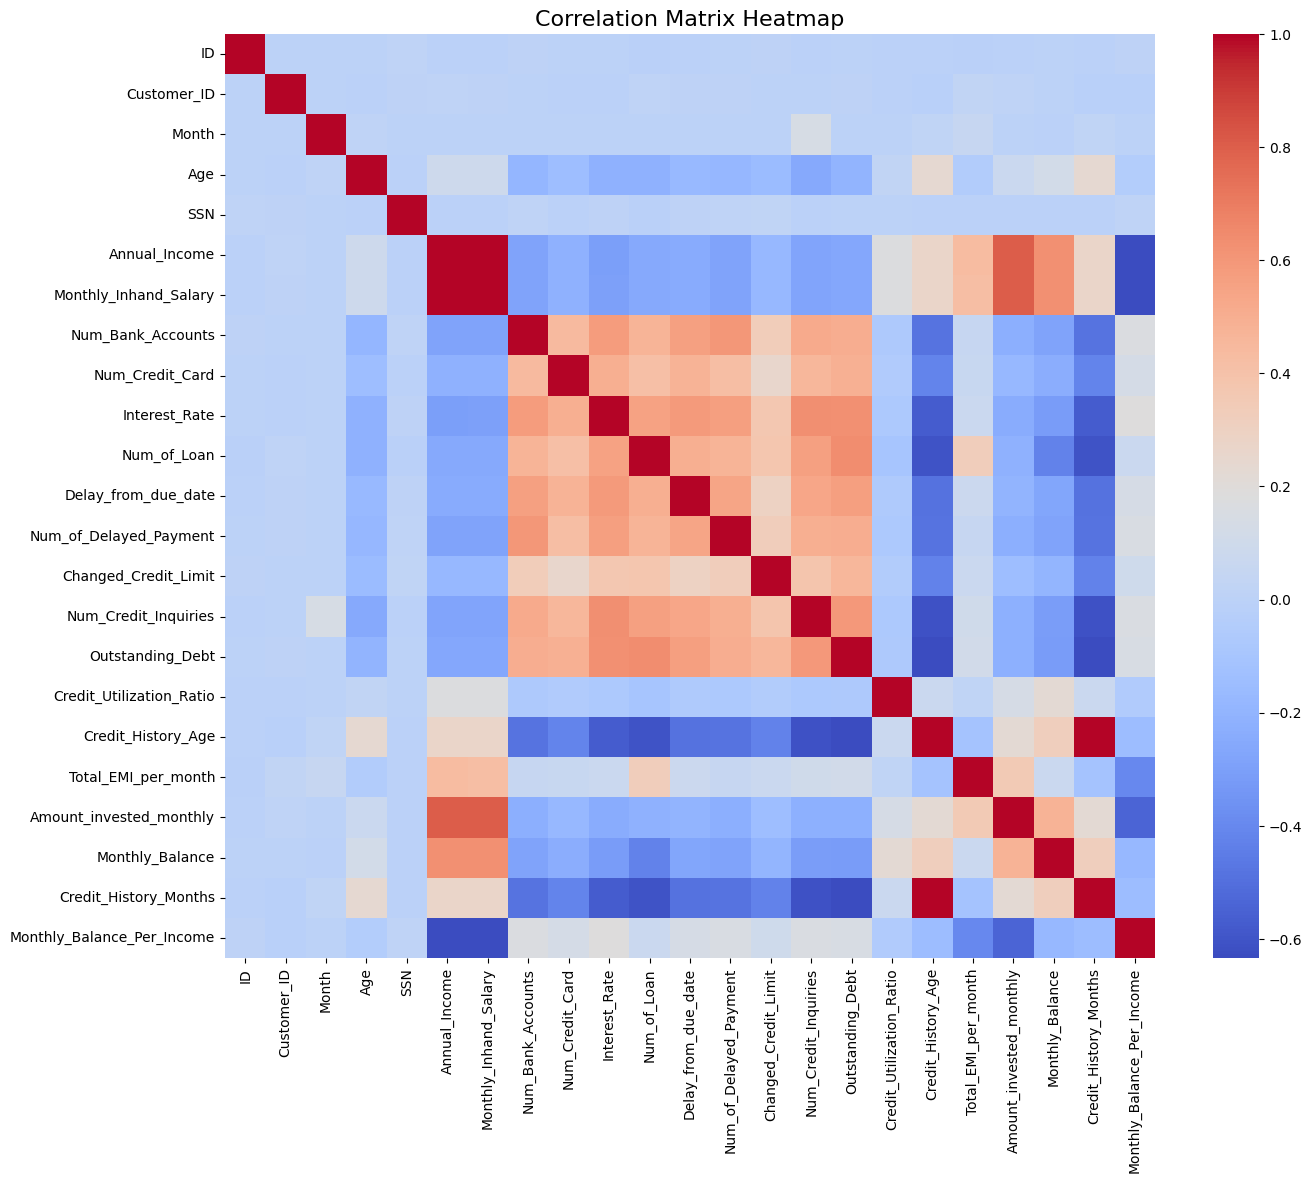

In [40]:
# Correlation Heatmap
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 12))
sns.heatmap(df[numerical_cols].corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

/tmp/ipython-input-2275017608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y=col, data=df, palette="coolwarm")


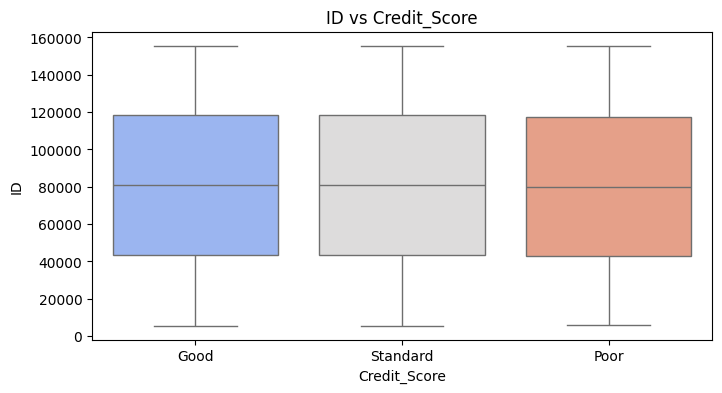

/tmp/ipython-input-2275017608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y=col, data=df, palette="coolwarm")


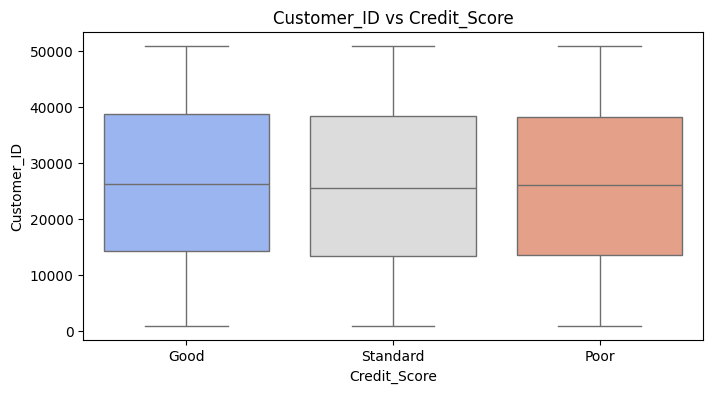

/tmp/ipython-input-2275017608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y=col, data=df, palette="coolwarm")


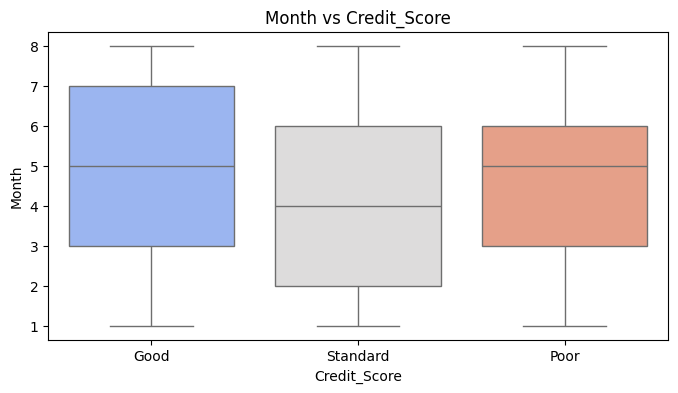

/tmp/ipython-input-2275017608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y=col, data=df, palette="coolwarm")


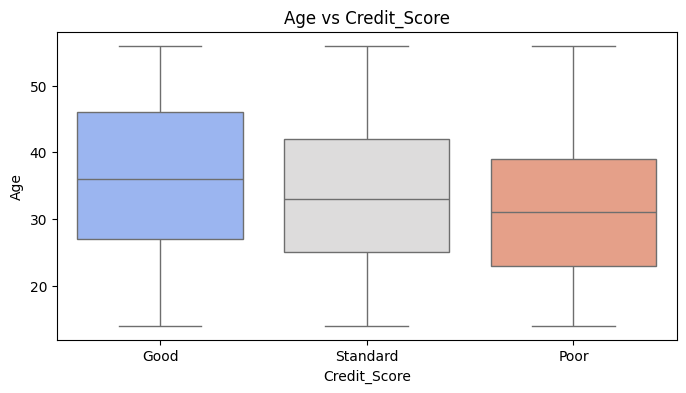

/tmp/ipython-input-2275017608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y=col, data=df, palette="coolwarm")


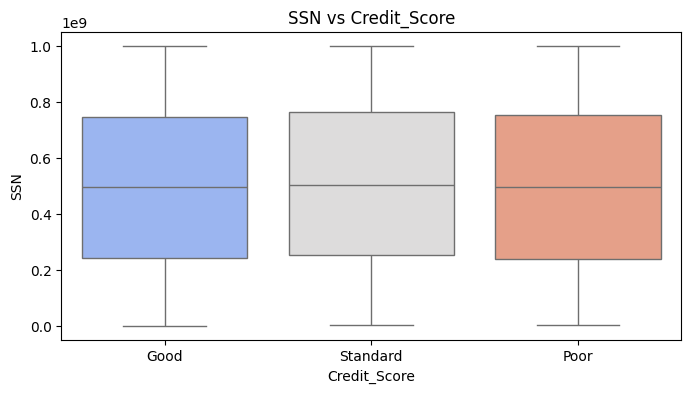

/tmp/ipython-input-2275017608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y=col, data=df, palette="coolwarm")


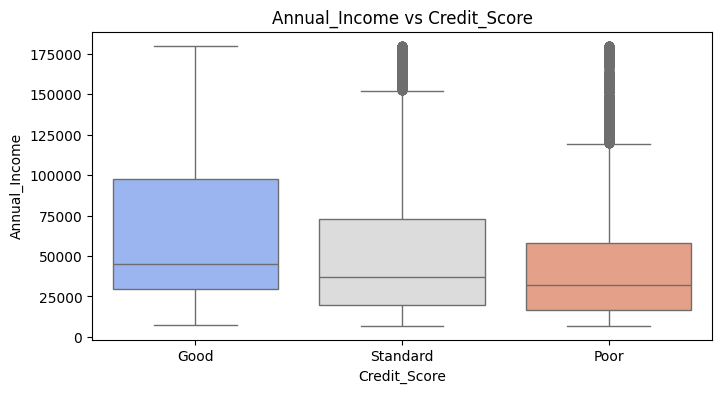

/tmp/ipython-input-2275017608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y=col, data=df, palette="coolwarm")


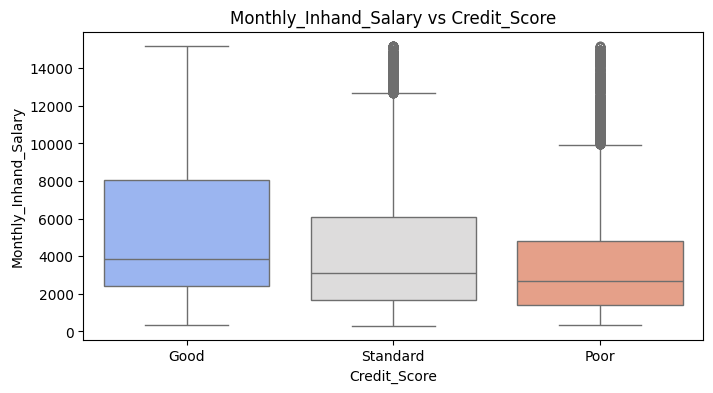

/tmp/ipython-input-2275017608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y=col, data=df, palette="coolwarm")


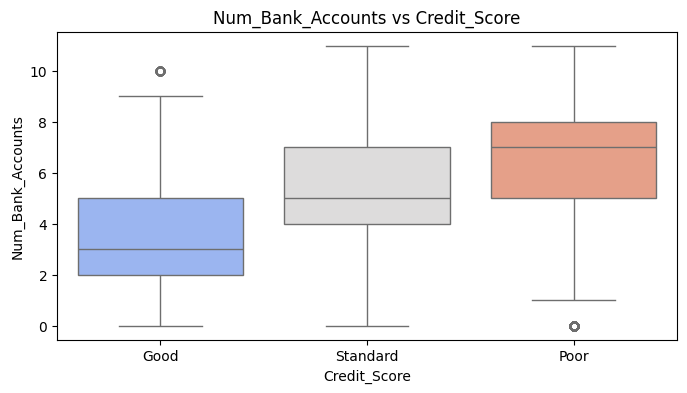

/tmp/ipython-input-2275017608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y=col, data=df, palette="coolwarm")


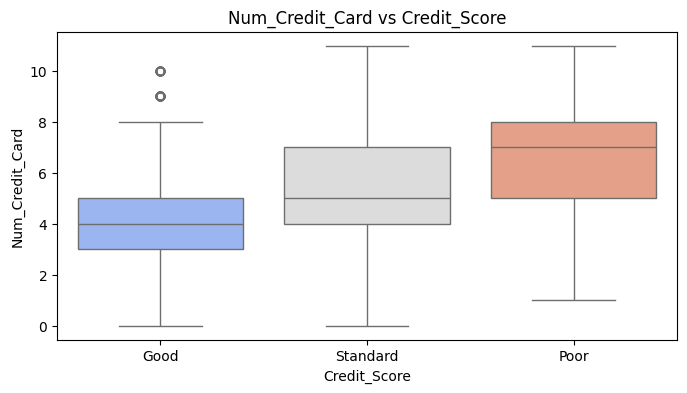

/tmp/ipython-input-2275017608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y=col, data=df, palette="coolwarm")


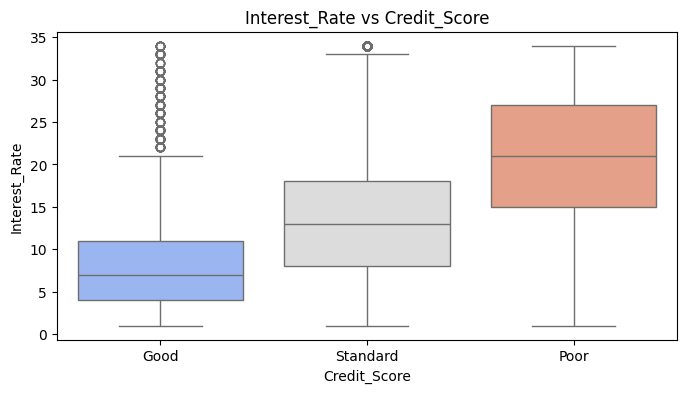

/tmp/ipython-input-2275017608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y=col, data=df, palette="coolwarm")


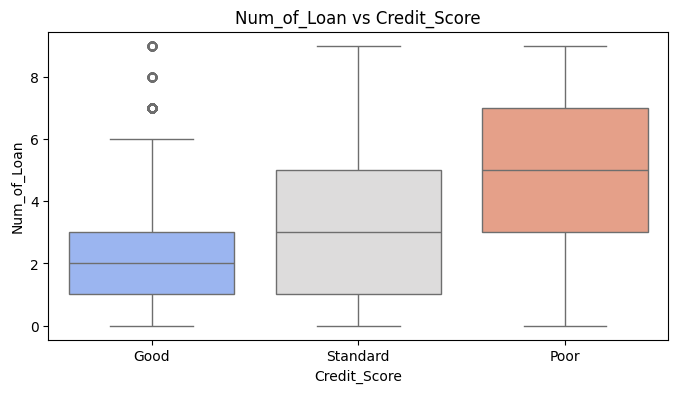

/tmp/ipython-input-2275017608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y=col, data=df, palette="coolwarm")


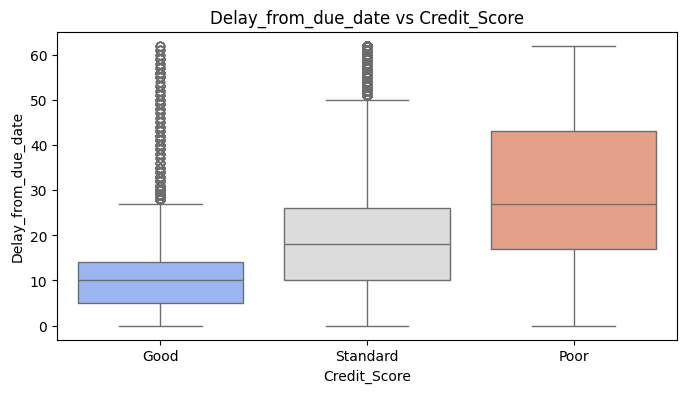

/tmp/ipython-input-2275017608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y=col, data=df, palette="coolwarm")


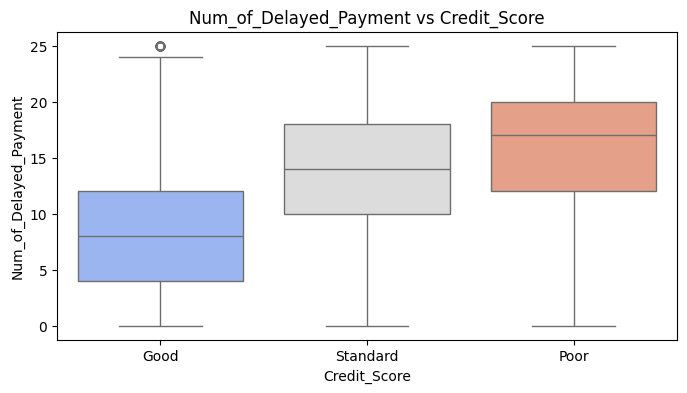

/tmp/ipython-input-2275017608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y=col, data=df, palette="coolwarm")


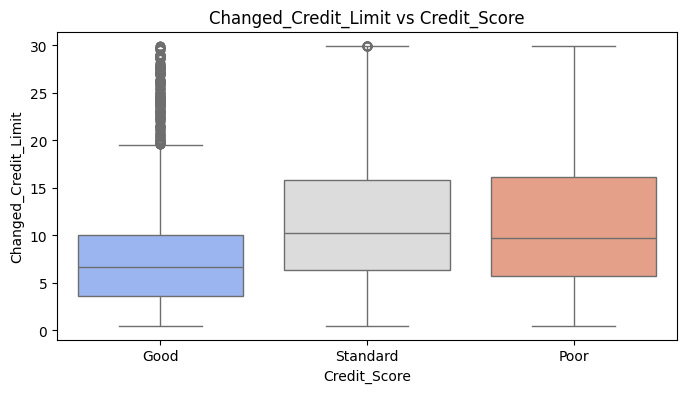

/tmp/ipython-input-2275017608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y=col, data=df, palette="coolwarm")


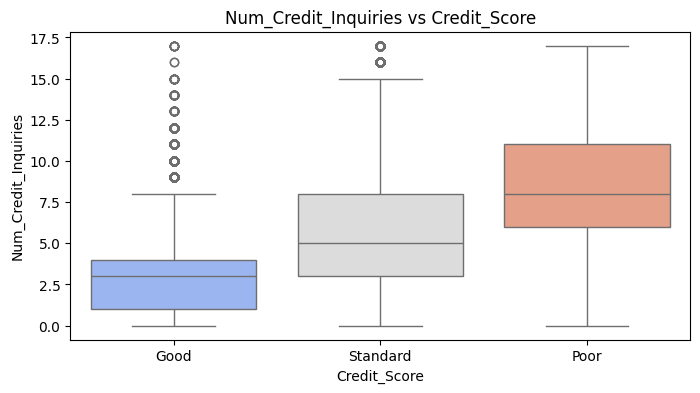

/tmp/ipython-input-2275017608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y=col, data=df, palette="coolwarm")


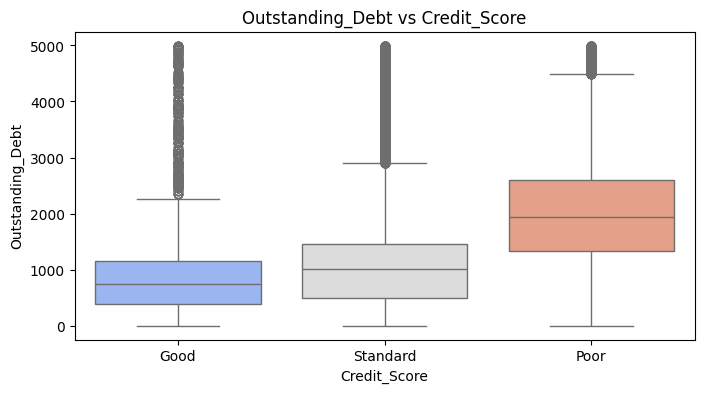

/tmp/ipython-input-2275017608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y=col, data=df, palette="coolwarm")


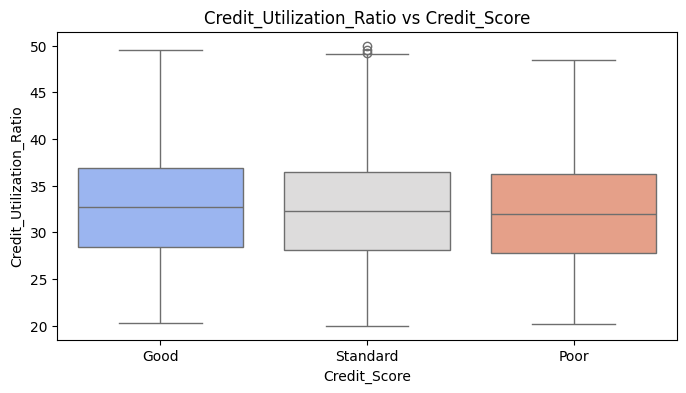

/tmp/ipython-input-2275017608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y=col, data=df, palette="coolwarm")


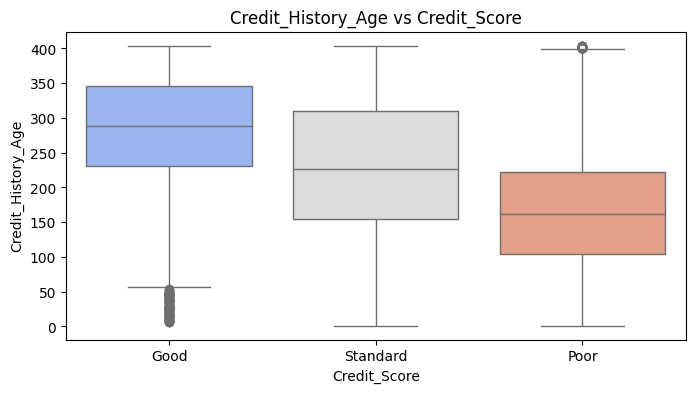

/tmp/ipython-input-2275017608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y=col, data=df, palette="coolwarm")


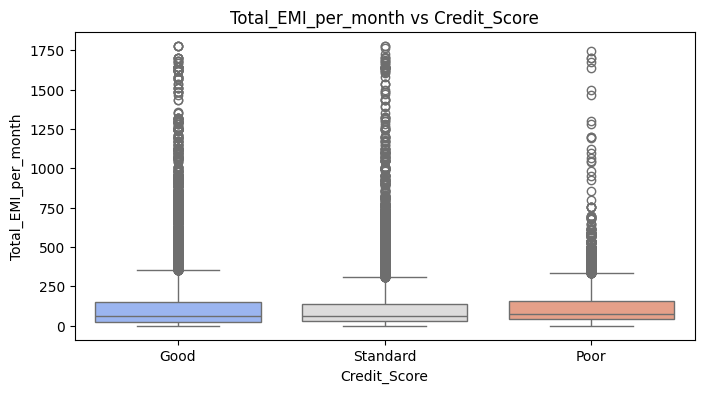

/tmp/ipython-input-2275017608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y=col, data=df, palette="coolwarm")


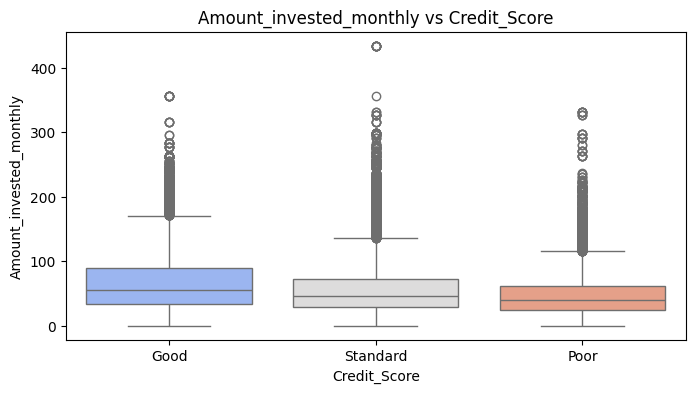

/tmp/ipython-input-2275017608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y=col, data=df, palette="coolwarm")


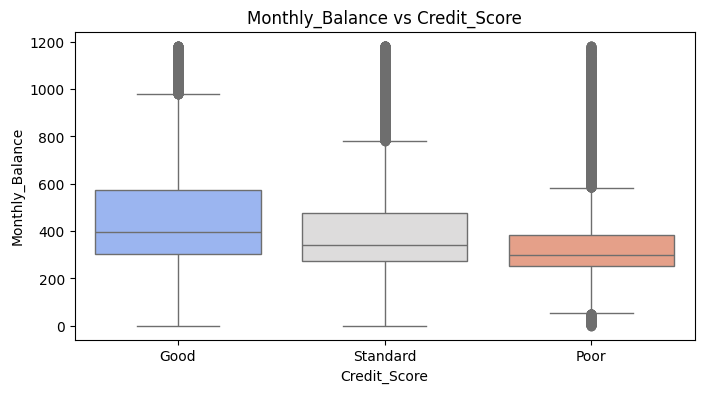

/tmp/ipython-input-2275017608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y=col, data=df, palette="coolwarm")


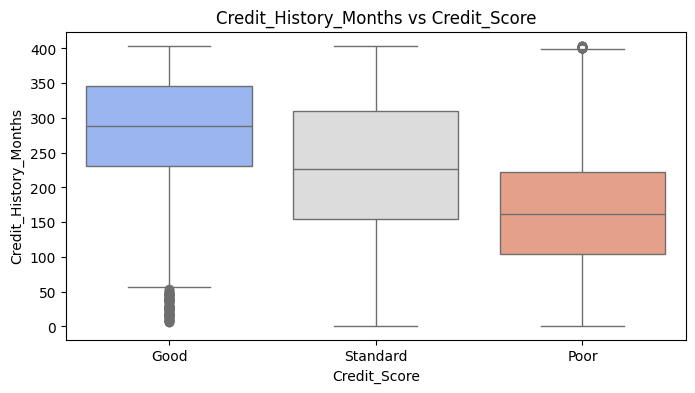

/tmp/ipython-input-2275017608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y=col, data=df, palette="coolwarm")


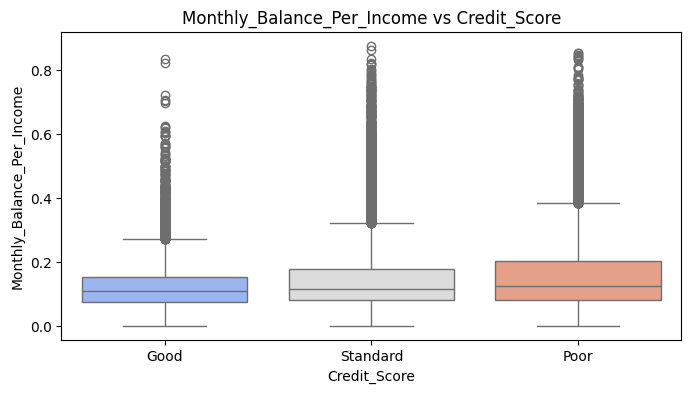

In [41]:
# Bivariate Analysis
# Numerical vs Target
if "Credit_Score" in df.columns:
    for col in num_cols:
        plt.figure(figsize=(8,4))
        sns.boxplot(x="Credit_Score", y=col, data=df, palette="coolwarm")
        plt.title(f"{col} vs Credit_Score")
        plt.show()

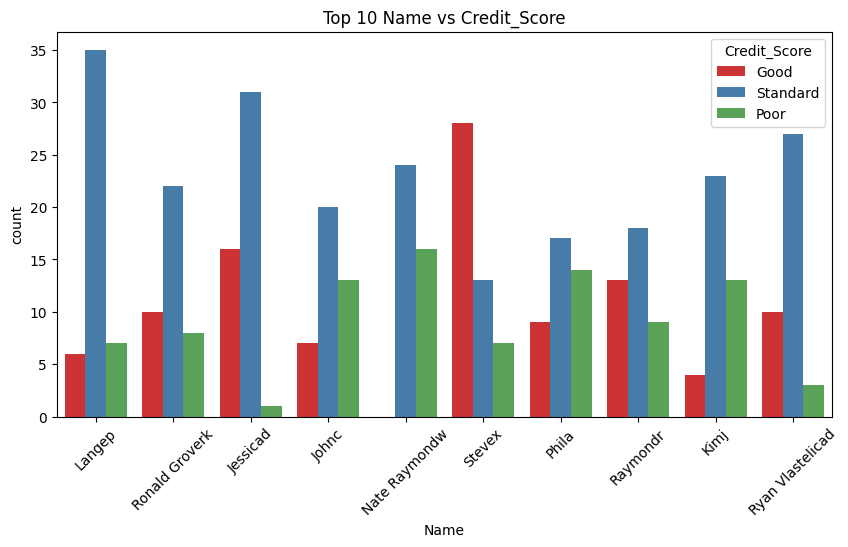

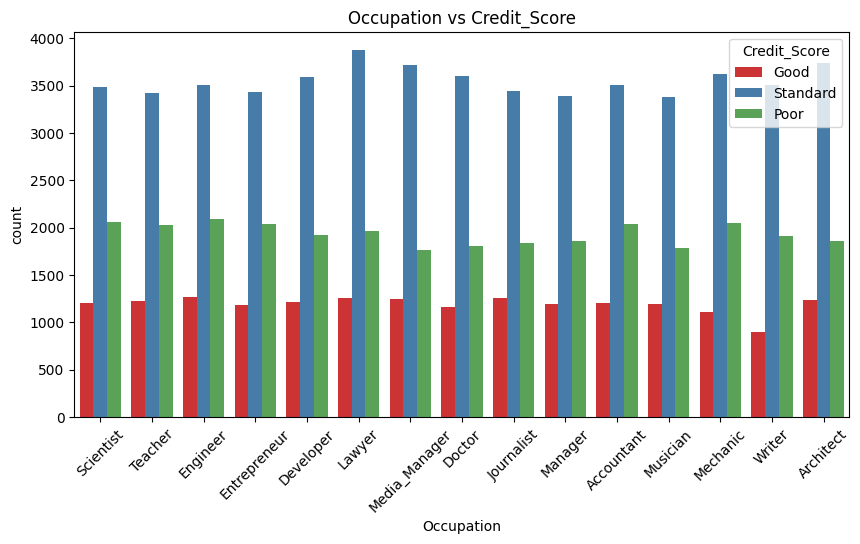

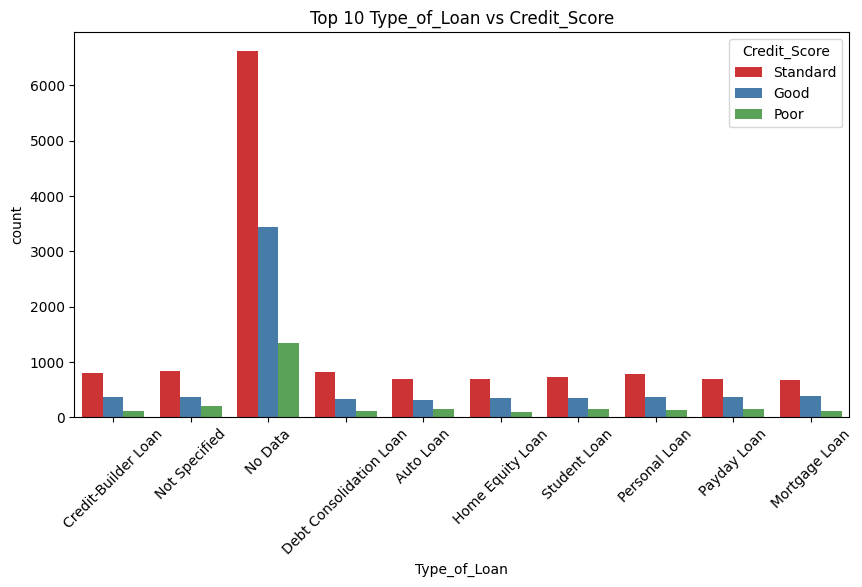

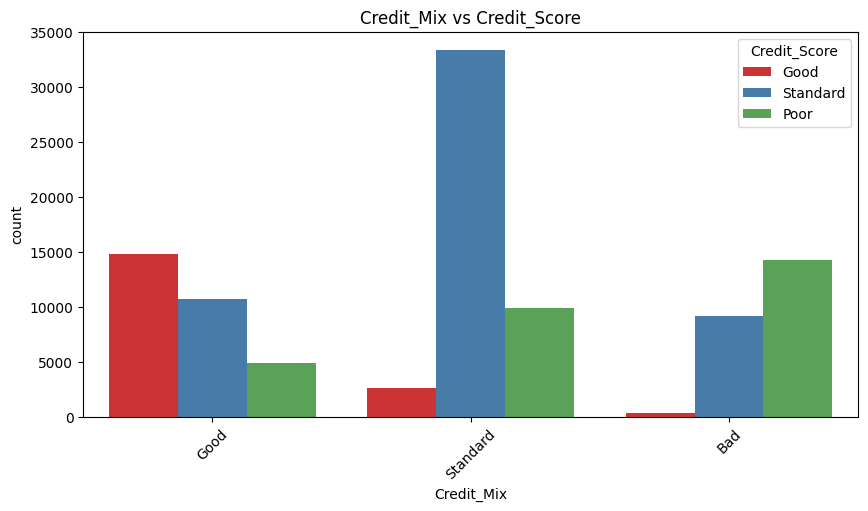

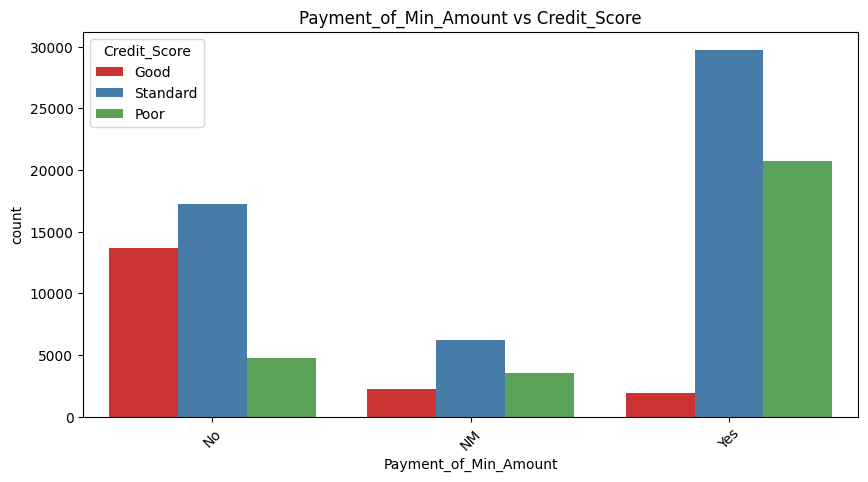

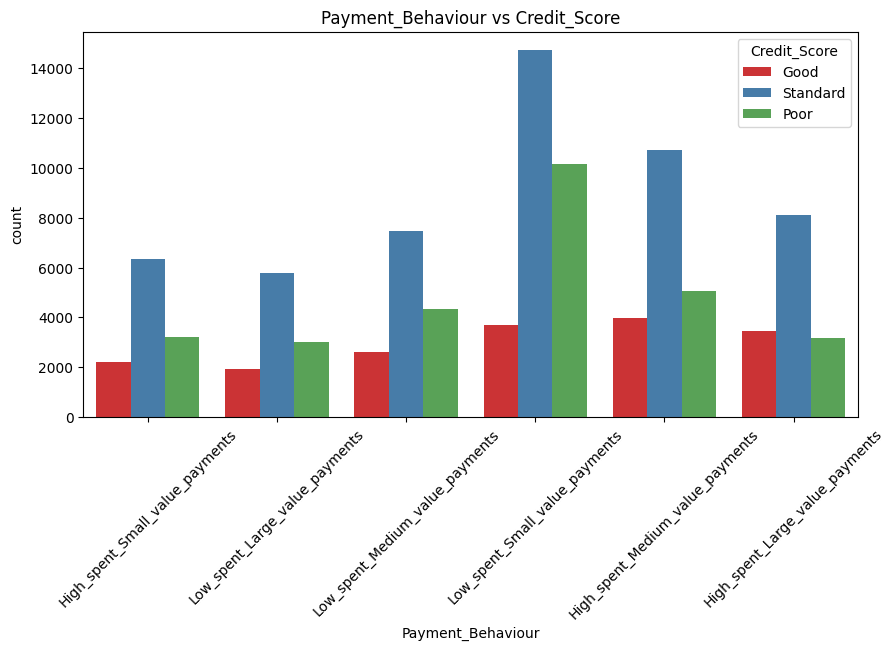

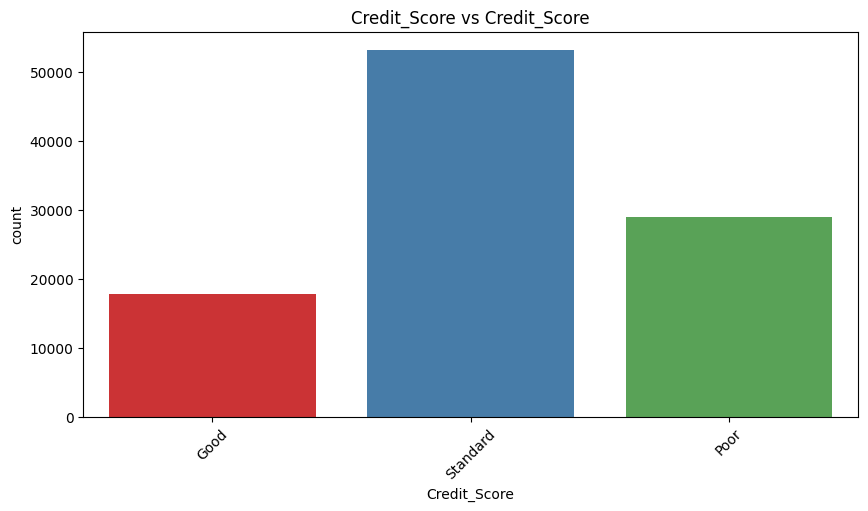

In [42]:
# Categorical vs Target (Fixed)
if "Credit_Score" in df.columns:
    for col in cat_cols:
        plt.figure(figsize=(10,5))

        # Skip columns like Name which have too many unique categories
        if df[col].nunique() > 20:
            top_categories = df[col].value_counts().nlargest(10).index
            temp_df = df[df[col].isin(top_categories)]
            sns.countplot(x=col, hue="Credit_Score", data=temp_df, palette="Set1")
            plt.title(f"Top 10 {col} vs Credit_Score")
        else:
            sns.countplot(x=col, hue="Credit_Score", data=df, palette="Set1")
            plt.title(f"{col} vs Credit_Score")

        plt.xticks(rotation=45)
        plt.show()


/tmp/ipython-input-4093733431.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Monthly_Balance', palette='viridis')


Text(0.5, 1.0, 'Monthly Balance Outliers')

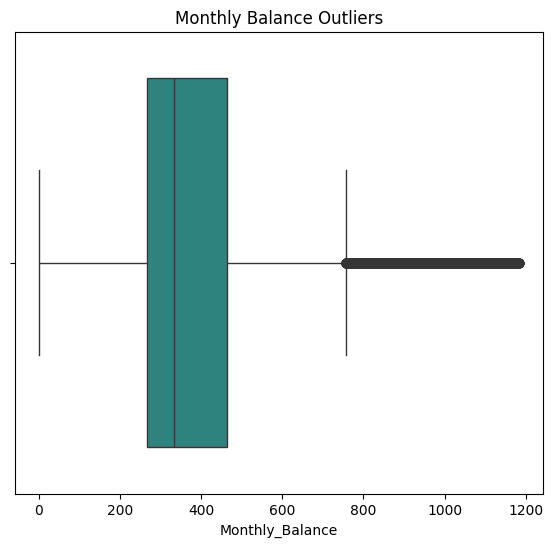

In [43]:
# Checking for outliers in key columns
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Monthly_Balance', palette='viridis')
plt.title('Monthly Balance Outliers')

/tmp/ipython-input-437533651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Annual_Income', palette='viridis')


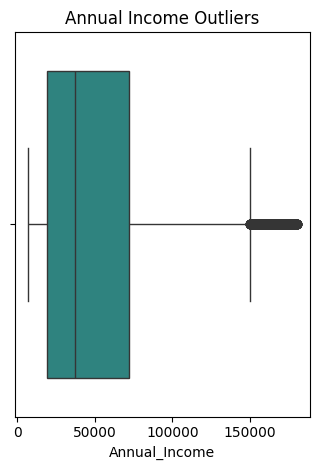

In [44]:
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Annual_Income', palette='viridis')
plt.title('Annual Income Outliers')
plt.tight_layout()
plt.show()

In [45]:
# Final Summary
print("\n📌 FINAL INSIGHTS / CONCLUSIONS:")
print("- Total unique customers:", df['Customer_ID'].nunique())
print("- Average Age:", round(df['Age'].mean(),2))
print("- Average Annual Income:", round(df['Annual_Income'].mean(),2))
print("- Most Common Occupation:", df['Occupation'].mode()[0])
if "Credit_Score" in df.columns:
    print("- Most Frequent Credit Score:", df['Credit_Score'].mode()[0])
print("- Missing values handled successfully")
print("- Outliers detected in income/balance columns")
print("- Data ready for further modeling (ML)")


📌 FINAL INSIGHTS / CONCLUSIONS:
- Total unique customers: 12500
- Average Age: 33.32
- Average Annual Income: 50505.12
- Most Common Occupation: Lawyer
- Most Frequent Credit Score: Standard
- Missing values handled successfully
- Outliers detected in income/balance columns
- Data ready for further modeling (ML)


In [46]:
# --- Part 2: Machine Learning Model ---

In [47]:
# preprocessing for the model
le = LabelEncoder()
df['Credit_Score_Encoded'] = le.fit_transform(df['Credit_Score'])
df['Credit_Mix_Encoded'] = le.fit_transform(df['Credit_Mix'])

In [48]:
features = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
            'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
            'Credit_Utilization_Ratio', 'Credit_History_Months', 'Credit_Mix_Encoded']
target = 'Credit_Score_Encoded'

X = df[features]
y = df[target]


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
y_pred = model.predict(X_test)

In [52]:
# --- Part 3: Checking the model ---

In [53]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

In [54]:
print("\n" + "="*50)
print(f"Model ki Accuracy: {accuracy*100:.2f}%")
print("="*50)
print("\nClassification Report:")
print(report)


Model ki Accuracy: 80.86%

Classification Report:
              precision    recall  f1-score   support

         Bad       0.77      0.76      0.76      3527
        Good       0.80      0.83      0.82      5874
    Standard       0.83      0.81      0.82     10599

    accuracy                           0.81     20000
   macro avg       0.80      0.80      0.80     20000
weighted avg       0.81      0.81      0.81     20000

